Simple Linear Regression

In [2]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading data 
dataset = pd.read_csv('Salary_Data.csv')
dataset
# print(dataset.shape)
# dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X2 = dataset['YearsExperience'].values
Y2 = dataset['Salary'].values

#mean of our inputs and outputs
x2_mean = np.mean(X2)
y2_mean = np.mean(Y2)

In [ ]:
#total number of values
n = len(X2)

In [ ]:
numerator = 0
denominator = 0

In [ ]:
for i in range(n):
    numerator += (X2[i] - x2_mean) * (Y2[i] - y2_mean)
    denominator += (X2[i] - x2_mean) ** 2
    
b1 = numerator / denominator
b0 = y2_mean - (b1 * x2_mean)

#printing the coefficient
print(b1, b0)


9449.962321455077 25792.20019866869


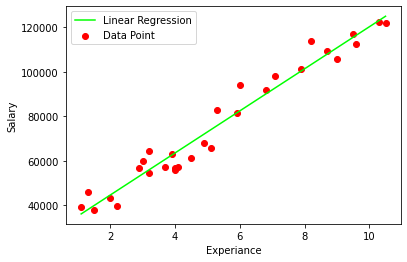

In [ ]:
x_max = np.max(X2)
x_min = np.min(X2) 

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X2, Y2, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Experiance')

#y-axis label
plt.ylabel('Salary')

plt.legend()
plt.show()

In [ ]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X2[i]
    rmse += (Y2[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

5592.043608760662


In [ ]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X2[i]
    sumofsquares += (Y2[i] - y2_mean) ** 2
    sumofresiduals += (Y2[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)

0.9569566641435086


Multiple Linear Regression

In [7]:
df1 = pd.read_csv('50_Startups.csv')
# dataset12
print(df1.shape)
df1.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
d = {"New York":0,"California":1,"Florida":2}

In [9]:
df1['State'] = df1['State'].map(d)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [11]:
d={"New York":0,"California":1,"Florida":2}

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [18]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [19]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 6989423130.593797
Cost is: 94587415.42066412
Cost is: 52096885.91211439
Cost is: 43974963.27802271
Cost is: 41692390.50286581
Cost is: 41047622.3540546
Cost is: 40865480.61615778
Cost is: 40814027.02013975
Cost is: 40799491.78728171
Cost is: 40795385.69926017


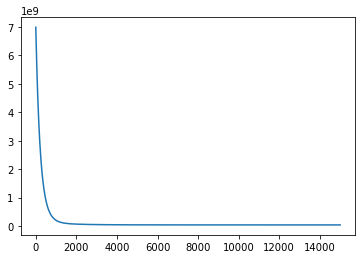

In [20]:
plt.plot(c)

In [23]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [22]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.940094448630507